In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [3]:
yelp = pd.read_csv('yelp.csv')

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


I'll create a new column called "text length" which is the number of words in the text column.

In [7]:
yelp['text length'] = yelp['text'].apply(lambda x: len(x.split()))

# EDA

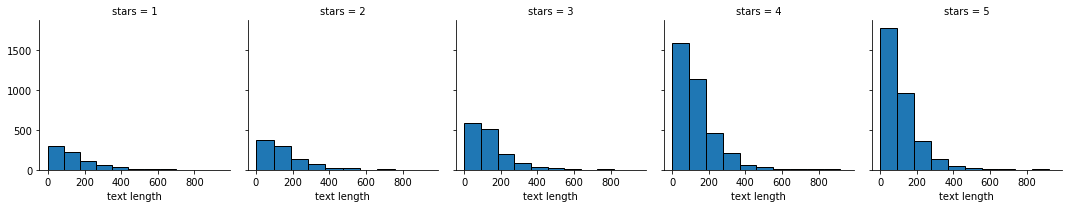

In [8]:
facet = sns.FacetGrid(data=yelp,col='stars')
facet = facet.map(plt.hist, 'text length', edgecolor="black")

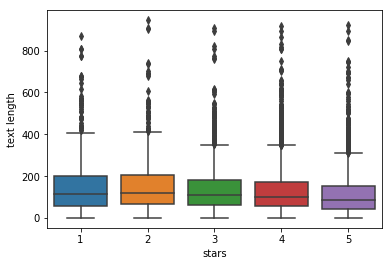

In [9]:
sns.boxplot(x='stars',y='text length',data=yelp)

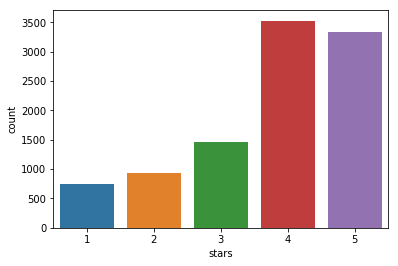

In [10]:
sns.countplot(x='stars',data=yelp)

In [11]:
yelp.groupby(by='stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,153.953271
2,0.719525,1.563107,0.875944,156.435814
3,0.788501,1.306639,0.694730,140.714579
4,0.954623,1.395916,0.670448,131.174135
5,0.944261,1.381780,0.608631,114.463590


There is a positive correlation between "Cool" ratings and stars, and a negative correlation between "Useful" and "Funny" reviews and stars. We can show this below.

In [12]:
vote_corr = yelp.groupby(by='stars').mean().corr()
vote_corr

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.865362
useful,-0.743329,1.000000,0.894506,0.697506
funny,-0.944939,0.894506,1.000000,0.847204
text length,-0.865362,0.697506,0.847204,1.000000


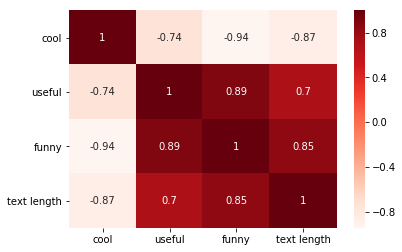

In [13]:
sns.heatmap(vote_corr,cmap='Reds',annot=True)

## NLP Classification Task

To make things a little easier, I'll only grab reviews that were either 1 star or 5 stars.

In [14]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

In [15]:
X = yelp_class['text']
y = yelp_class['stars']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
CV = CountVectorizer()

In [18]:
X = CV.fit_transform(X)

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
nb = MultinomialNB()

In [23]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

In [24]:
predictions = nb.predict(X_test)
predictions

array([5, 1, 5, ..., 5, 5, 5], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
print('Here is the Confusion Matrix: ')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Here is the Classification Report: ')
print(classification_report(y_test,predictions))

Here is the Confusion Matrix: 
[[159  69]
 [ 22 976]]


Here is the Classification Report: 
             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



# Using Text Processing

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
pipeline = Pipeline([
    ('CV',CountVectorizer()),
    ('TFIDF',TfidfTransformer()),
    ('NB',MultinomialNB())
])

### Train Test Split

In [30]:
X = yelp_class['text']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('CV', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...linear_tf=False, use_idf=True)), ('NB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

In [32]:
TFIDF_pred = pipeline.predict(X_test)

In [33]:
print('Here is the Confusion Matrix: ')
print(confusion_matrix(y_test,TFIDF_pred))
print('\n')
print('Here is the Classification Report: ')
print(classification_report(y_test,TFIDF_pred))

Here is the Confusion Matrix: 
[[  0 228]
 [  0 998]]


Here is the Classification Report: 
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\brown\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Looks like Tf-Idf actually made things worse! That is it for this project.